In [1]:
import zap
import pypsa
from zap.tests import network_examples as examples

In [2]:
pn = examples.load_example_network('texas_7node')
pn

INFO:pypsa.io:Imported network texas_7node.nc has buses, carriers, generators, lines, loads, storage_units


PyPSA Network
Components:
 - Bus: 7
 - Carrier: 17
 - Generator: 176
 - Line: 12
 - Load: 7
 - StorageUnit: 14
Snapshots: 48

In [3]:
net, devices = zap.importers.load_pypsa_network(pn, power_unit=1e3, cost_unit=10.0)

INFO:zap.importers.pypsa:Importing Generator with 136 devices.
INFO:zap.importers.pypsa:Importing Load with 7 devices.
INFO:zap.importers.pypsa:Importing ACLine with 12 devices.
INFO:zap.importers.pypsa:Importing StorageUnit with 14 devices.


In [4]:
results = net.dispatch(devices=devices, time_horizon=48)

/Users/kamrantehranchi/Library/Caches/pypoetry/virtualenvs/zap-qb0btW3r-py3.12/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


In [5]:
device_index = 0
results.power[0][0].shape

(136, 48)

In [9]:
zap_pypsa = zap.exporters.export_to_pypsa(net, devices, results, snapshots=pn.snapshots)
zap_pypsa

/Users/kamrantehranchi/Local_Documents/zap/zap/exporters/pypsa.py:370: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  n.generators_t[attr][name] = df.loc[name]
/Users/kamrantehranchi/Local_Documents/zap/zap/exporters/pypsa.py:370: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  n.generators_t[attr][name] = df.loc[name]
/Users/kamrantehranchi/Local_Documents/zap/zap/exporters/pypsa.py:370: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

PyPSA Network
Components:
 - Bus: 7
 - Generator: 136
 - Line: 12
 - Load: 7
 - StorageUnit: 14
Snapshots: 48

<Axes: xlabel='period,timestep'>

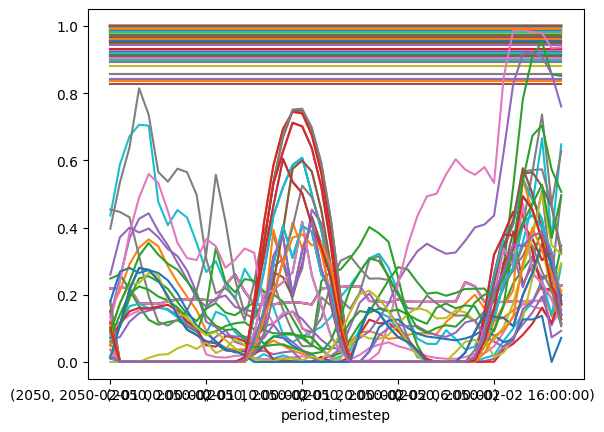

In [11]:
zap_pypsa.generators_t.p_max_pu.plot(legend=False)